0.860238485217282


Vec3(0, 0.49999999999999994, 0.8660254037844387) (0.5, 0.5)
Vec3(-0.6363262751221183, 7.792749360416602e-17, 0.771420035771181)
(0.028258781042322854, 0.024488601970353203) (0.028258781042322767, 0.0217993898825186, <vec3.Vec3 object at 0x103de79b0>, <vec3.Vec3 object at 0x103de7978>)
Vec3(-0.1432100323585176, -0.49999999999999994, 0.8541023865040259)
(0.05362388480800817, 0.04580028798813677) (0.053623884808006964, 0.04580028798813573, <vec3.Vec3 object at 0x103de7b38>)


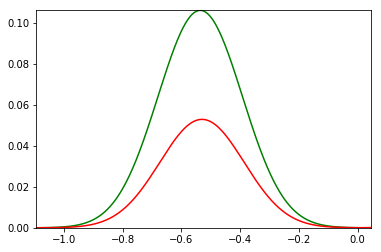

In [30]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

alpha = .1
zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /6;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);
    



phi_o = math.pi * 2.0 * random.uniform(0,1);
#wo = vec3.Vec3(math.sin(theta_o) * math.sin(phi_o), math.sin(theta_o)* math.cos(phi_o), math.cos(theta_o));
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -theta_o - math.pi * .5 
maxAngle = minAngle + math.pi 
minAngle += 1
maxAngle -= 1
rangeAngle = maxAngle - minAngle
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    wi = vec3.Vec3(0, math.sin(thetaWi), math.cos(thetaWi))
    beval = beckman.Eval(wo, wi, False)
    zeval = zipin.Eval(wo, wi)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(thetaWi)
    #xdata.append(mu)
    bdata.append(beval[0])
    zdata.append(zeval[0])
    


plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  



1.4448341712182988 -0.46579906503072


0.8668083907638165


0.2447587765468946 0.24475877654689454
